<a href="https://colab.research.google.com/github/baileymccluresinger/PUS2024_BSinger/blob/main/TNN_Notebook_11_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
y_train.shape

(60000,)

In [5]:
x_train.shape

(60000, 28, 28)

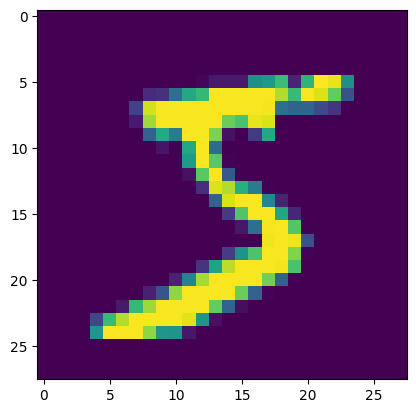

In [6]:
plt.imshow(x_train[0])

In [7]:
#check how many values are in the target variable
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [8]:
#check what is the mi and max value and data type of teh features dataset
np.min(x_train), np.max(x_train), x_train.dtype

(0, 255, dtype('uint8'))

In [9]:
testvar = np.array([255]).astype(np.uint8)

In [10]:
testvar + np.uint8(1)

array([0], dtype=uint8)

In [11]:
#scale the input data so that it is min=0 and max=1 (min-max scaling)
x_train = x_train /255.
x_test = x_test / 255.

In [12]:
x_train.dtype

dtype('float64')

In [13]:
x_train.reshape(60_000, 784).shape

(60000, 784)

In [15]:
input_shape = x_train.shape[1:]

In [21]:
from tensorflow.keras.layers import Dense

#architecture hyperparameters
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape=input_shape))
#add 1 dense layer with 128 neurons and relu activation
model1.add(Dense(128, activation='relu'))
#add 1 dropout layer dropping 20% of connections
model1.add(tf.keras.layers.Dropout(0.2))
#add 1 dense layer with 10 neurons
model1.add(Dense(10, activation='relu'))
#add the output layer with 1 and linear activation
model1.add(Dense(1, activation='linear'))
model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,781 (397.58 KB)

 Trainable params: 101,781 (397.58 KB)

 Non-trainable params: 0 (0.00 B)

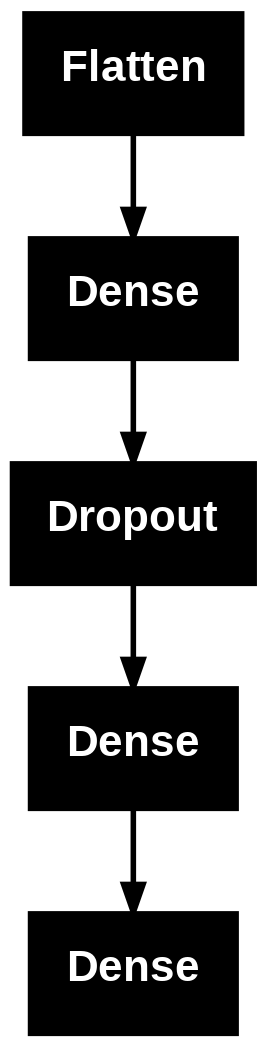

In [22]:
tf.keras.utils.plot_model(model1)

In [23]:
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

In [28]:
model1.compile(optimizer = optimizer, loss = loss_fn, batch_size=32, metrics = ['accuracy'])
training_history = model1.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2023 - loss: 0.4143
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2032 - loss: 0.3939
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2050 - loss: 0.3608
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2059 - loss: 0.3258
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2002 - loss: 0.3298


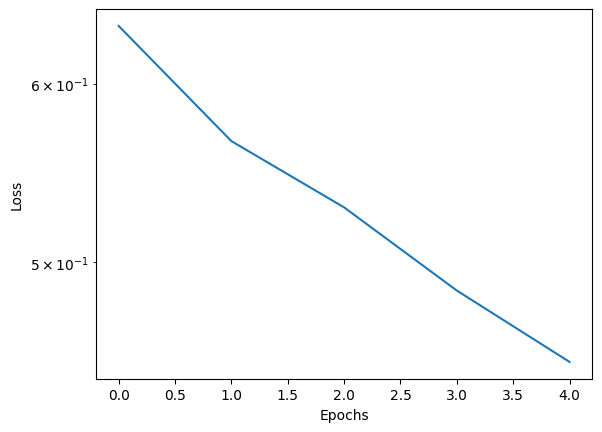

In [26]:
plt.plot(training_history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.yscale('log')

In [27]:
model1.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2005 - loss: 0.5634


[0.4941883385181427, 0.2029000073671341]

In [ ]:
model1.predict